In [12]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
file_path = "../../cleaned_train_data.csv"
data = pd.read_csv(file_path)

data.head()

,sentiment,content
0,sadness,didnt feel humiliated
1,sadness,go feeling hopeless damned hopeful around some...
2,anger,im grabbing minute post feel greedy wrong
3,love,ever feeling nostalgic fireplace know still pr...
4,anger,feeling grouchy


In [14]:
data.sentiment.value_counts()

joy         5350
sadness     4664
anger       2155
fear        1933
love        1299
surprise     568
Name: sentiment, dtype: int64

In [15]:
data = data.dropna(subset=['content'])

In [16]:
X = data['content'].astype(str)
y = data['sentiment']

le = LabelEncoder()
y = le.fit_transform(y)

vec = TfidfVectorizer()
X = vec.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=50)

In [18]:
rfc = RandomForestClassifier(random_state=0 )

In [19]:
rfc.fit(X_train, y_train)
rf_pred = rfc.predict(X_test)

In [20]:
print(classification_report(y_test, rf_pred, zero_division='warn'))
confusion_m = confusion_matrix(y_test, rf_pred)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       420
           1       0.83      0.89      0.86       380
           2       0.88      0.91      0.90      1060
           3       0.86      0.73      0.79       284
           4       0.91      0.91      0.91       948
           5       0.89      0.69      0.77       102

    accuracy                           0.88      3194
   macro avg       0.87      0.83      0.85      3194
weighted avg       0.88      0.88      0.88      3194



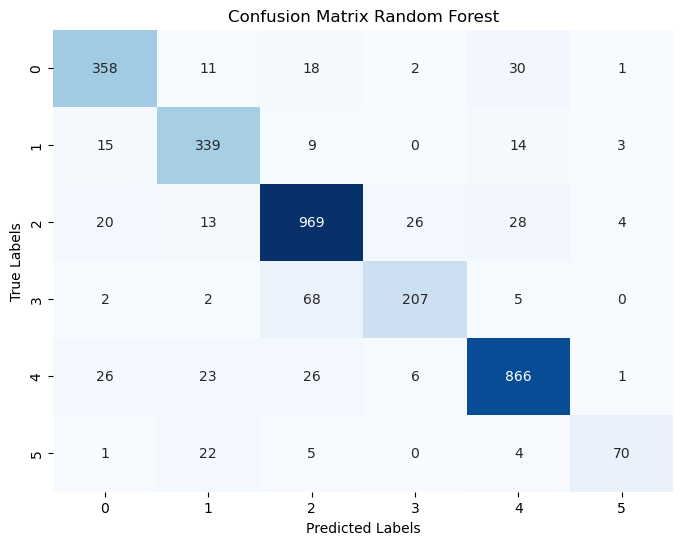

In [21]:
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_m, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix Random Forest')
plt.show()

In [22]:
accuracy = accuracy_score(y_test, rf_pred) # accuracy
precision = precision_score(y_test, rf_pred, average='weighted', zero_division=1) # precision 
recall = recall_score(y_test, rf_pred, average='weighted') # recall
f1 = f1_score(y_test, rf_pred, average='weighted') # f1

print("Name: ", "RF")
print("Accuracy: ", accuracy)
print("Precision: ", precision)
print("Recall: ", recall)
print("F1: ", f1)

Name:  RF
Accuracy:  0.8794614902943018
Precision:  0.8796974515585635
Recall:  0.8794614902943018
F1:  0.8784736106391516
